# Healthcare Insurance Expenses

## Data Preprocessing 

In [1]:
#import necessary libraries for data preprocessing and analysis
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 


In [2]:
dataset=pd.read_csv(r'insurance.csv')# read csv file by 

In [3]:
df=pd.DataFrame(dataset) # convert dataset into dataframe

In [4]:
df.head()# display first five rows of dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
Dup=df.duplicated().sum()

In [6]:
print(Dup)

1


In [7]:
df.drop_duplicates(inplace=True) # drop duplicate values if any

In [8]:
print(df.duplicated().sum())

0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [10]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


### Encoding Categorial Data 

### By ColumnTransformer


 To convert categorical data into numerical data (sex,smoker,region) to be saved in dataframe.The model treats with numerical data only not categorical data.Machine Learning model often depends on mathematical calculations & mathematical equations

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder



In [12]:

ohe=OneHotEncoder(sparse_output=False)
df['sex']=ohe.fit_transform(df[['sex']])
df['smoker']=ohe.fit_transform(df[['smoker']])
df['region']=ohe.fit_transform(df[['region']])

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,0.0,0.0,16884.92400
1,18,0.0,33.770,1,1.0,0.0,1725.55230
2,28,0.0,33.000,3,1.0,0.0,4449.46200
3,33,0.0,22.705,0,1.0,0.0,21984.47061
4,32,0.0,28.880,0,1.0,0.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0.0,30.970,3,1.0,0.0,10600.54830
1334,18,1.0,31.920,0,1.0,1.0,2205.98080
1335,18,1.0,36.850,0,1.0,0.0,1629.83350
1336,21,1.0,25.800,0,1.0,0.0,2007.94500


### Feature Extraction 

#### Correlation

In order to make correlation, we need to change the datatype of the following columns: <code>sex</code> column,<code>smoker</code> column & <code>region</code>  column.

In [14]:
df['sex']=df['sex'].astype('int64')
df['smoker']=df['smoker'].astype('int64')
df['region']=df['region'].astype('int64')

In [15]:
Correlation=df.corr()

<Axes: >

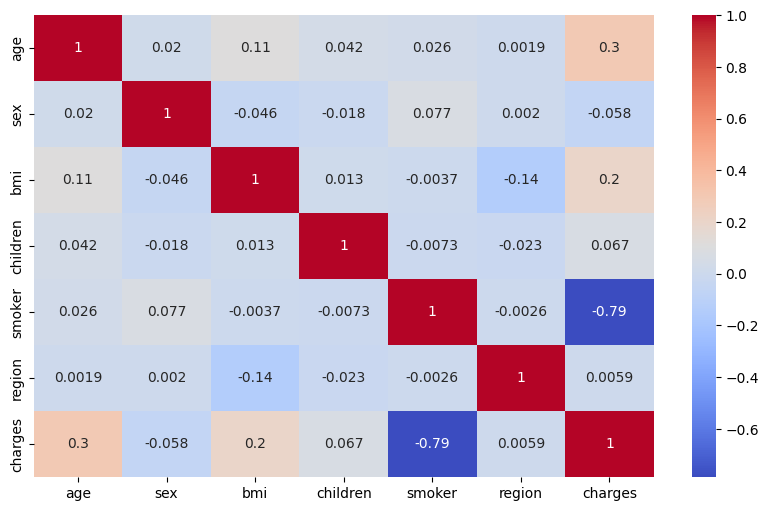

In [16]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(Correlation,annot=True,cmap='coolwarm')

In [17]:
df1=df[['smoker','age','bmi']]


In [18]:
df1

,smoker,age,bmi
0,0,19,27.900
1,1,18,33.770
2,1,28,33.000
3,1,33,22.705
4,1,32,28.880
...,...,...,...
1333,1,50,30.970
1334,1,18,31.920
1335,1,18,36.850
1336,1,21,25.800


In [19]:
df1.bmi=np.round(df1.bmi)

C:\Users\Ramy Bishop Mina\AppData\Local\Temp\ipykernel_11616\4109168540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.bmi=np.round(df1.bmi)


In [20]:
df1.bmi

0       28.0
1       34.0
2       33.0
3       23.0
4       29.0
        ... 
1333    31.0
1334    32.0
1335    37.0
1336    26.0
1337    29.0
Name: bmi, Length: 1337, dtype: float64

In [21]:
df1.bmi=df1.bmi.astype('int64')

C:\Users\Ramy Bishop Mina\AppData\Local\Temp\ipykernel_11616\2822653544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.bmi=df1.bmi.astype('int64')


In [22]:
df1.bmi

0       28
1       34
2       33
3       23
4       29
        ..
1333    31
1334    32
1335    37
1336    26
1337    29
Name: bmi, Length: 1337, dtype: int64

In [23]:
from sklearn.feature_selection import mutual_info_regression
array=mutual_info_regression(df[['sex','age','smoker','region','bmi']],df['charges'],random_state=1) # to determine quantity of info of input about output 

In [24]:
print(array)

[0.17628108 1.50170309 0.36927572 0.05433098 0.07271747]


#### P value

In [25]:
from sklearn.feature_selection import f_regression
_,f_pvalue=f_regression(df[['sex','age','smoker','region','bmi']],df['charges']) # to determine linear relationship between input and output
f_pvalueDf=pd.DataFrame({'Feature':df[['sex','age','smoker','region','bmi']].columns,'P_Value':f_pvalue}).sort_values(by='P_Value')
print(f_pvalueDf)

  Feature        P_Value
2  smoker  1.406722e-282
1     age   6.975749e-29
4     bmi   2.468040e-13
0     sex   3.382079e-02
3  region   8.280607e-01


### Visualizing importance of features according to output(P_value & mutual info regression)

In [26]:
colors=[]
for _ in range(5):
    color="{:06x}".format(np.random.randint(0xFFFFFF))
    colors.append(color)
    

In [27]:
input=df[['sex','age','smoker','region','bmi']].columns

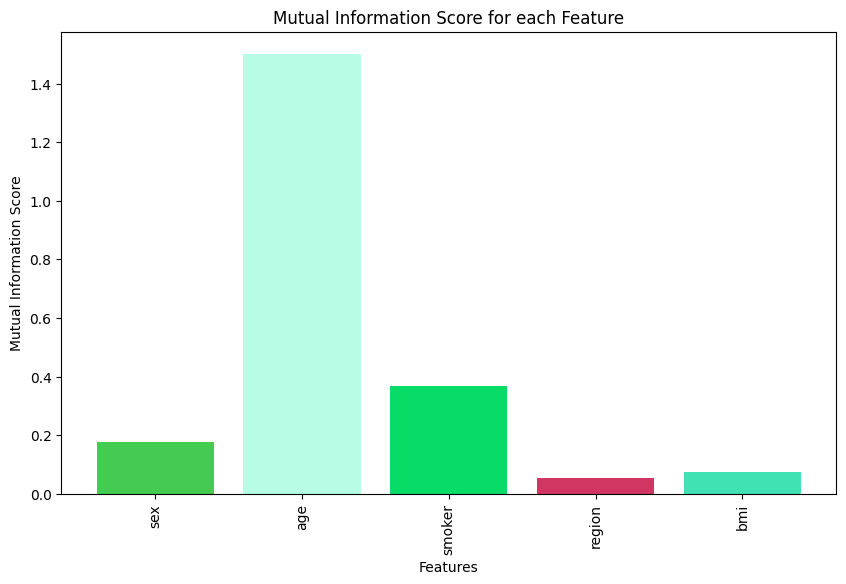

In [28]:
plt.figure(figsize=(10,6))
plt.bar(input,array,color=['#'+color for color in colors])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score for each Feature')
plt.show()

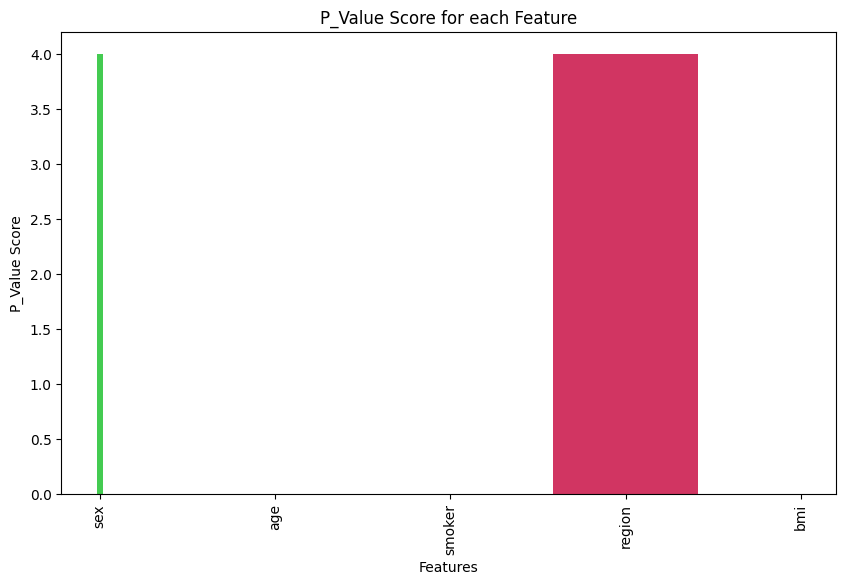

In [29]:
plt.figure(figsize=(10,6))
plt.bar(input,_,f_pvalue,color=['#'+color for color in colors])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('P_Value Score')
plt.title('P_Value Score for each Feature')
plt.show()

## Linear Regression

### Splitting the dataset

In [30]:
input=df1
output=df['charges']

In [31]:
print(input)

      smoker  age  bmi
0          0   19   28
1          1   18   34
2          1   28   33
3          1   33   23
4          1   32   29
...      ...  ...  ...
1333       1   50   31
1334       1   18   32
1335       1   18   37
1336       1   21   26
1337       0   61   29

[1337 rows x 3 columns]


In [32]:
print(output)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [33]:
from sklearn.model_selection import train_test_split
input_train,input_test,output_train,output_test=train_test_split(input,output,test_size=0.3,random_state=42)

In [34]:
print(input_train)

      smoker  age  bmi
138        1   54   32
381        0   55   31
292        0   25   46
1090       0   47   36
893        0   47   39
...      ...  ...  ...
1096       0   51   35
1131       1   27   46
1295       1   20   22
861        1   38   28
1127       1   35   36

[935 rows x 3 columns]


In [35]:
print(output_train)

138     27322.73386
381     42303.69215
292     42112.23560
1090    41676.08110
893     44202.65360
           ...     
1096    44641.19740
1131     3693.42800
1295     1964.78000
861      7151.09200
1127     5836.52040
Name: charges, Length: 935, dtype: float64


In [36]:
print(input_test)

      smoker  age  bmi
900        1   49   23
1064       1   29   26
1256       1   51   36
298        0   31   34
237        1   31   38
...      ...  ...  ...
662        1   32   32
1103       1   58   36
1333       1   50   31
332        1   61   31
355        1   46   28

[402 rows x 3 columns]


In [37]:
print(output_test)

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
662      5148.55260
1103    11363.28320
1333    10600.54830
332     13429.03540
355     24603.04837
Name: charges, Length: 402, dtype: float64


In [38]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(input_train,output_train)
print("Model Trained Successfully")

Model Trained Successfully


In [39]:
output_predicted=model.predict(input_test)


In [40]:
print(output_predicted)

[ 8467.25606455  4286.64431084 13027.73299725 30191.30495588
  8535.66141217 13139.15353523 29079.68795088  1873.47771134
 10981.73649812 10336.01505282 10913.33115049 33381.82694646
 30447.05451827 18076.90727221  9558.65966174  9313.01680325
  4165.11706897 31781.51259922  2896.47596091  5532.48363636
  4165.11706897 29601.29377956 14696.45269212 30368.54246674
 31325.72374342  4732.32646274 34873.30913046 37296.58243387
 10958.93471558 12260.48431008  6355.44259252 13083.44326624
   539.01963039 12582.05084536 40122.52269882 12404.8133345
  2663.52818106  2673.63488496 31768.81752058  9257.30653426
  6856.8350134  28899.86206528 33883.21936734 11781.89367174
  6765.62788323  4030.89474845  5833.83676384  9112.97750985
  4030.89474845  8712.89892304  6211.1135681  12138.9570682
 30457.16122217  4165.11706897 10725.98693573  9680.18690362
 10536.05434622  2329.26656714 31325.72374342  8912.93821644
 14073.53302937  8312.82033623 12037.64323413  1473.39912453
 16086.62104206  9801.7141

### Model Evolution

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
r2_score_value=r2_score(output_test,output_predicted)
print("R2 Score:",r2_score_value)

R2 Score: 0.7701503064280943


In [42]:
mae=mean_absolute_error(output_test,output_predicted)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 4219.085290485933


In [43]:
msqr=mean_squared_error(output_test,output_predicted)
print("Mean Squared Error:",msqr)

Mean Squared Error: 39331352.77834985


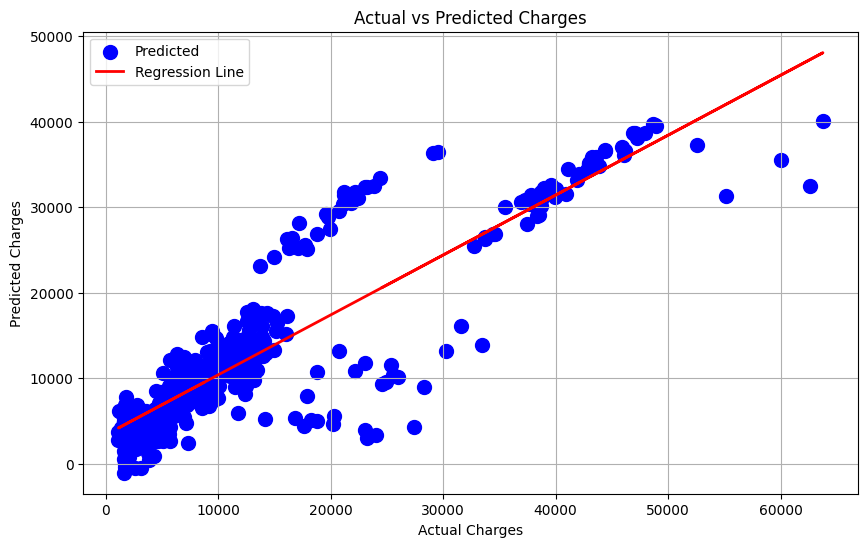

In [44]:
plt.figure(figsize=(10,6))

# Scatter plot
plt.scatter(output_test, output_predicted, color='blue', s=100, label='Predicted')

# ---- Calculate regression line between actual and predicted ----
m, b = np.polyfit(output_test, output_predicted, 1)  # slope, intercept
regression_line = m * output_test + b

# Plot regression line
plt.plot(output_test, regression_line, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()


## KNN 

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=5)
knn_model.fit(input_train,output_train)
print("KNN Model Trained Successfully")

KNN Model Trained Successfully


In [46]:
knn_output_predicted=knn_model.predict(input_test)

## Evolution of KNN model

In [47]:
r2_score_value=r2_score(output_test,knn_output_predicted)
print("R2 Score:",r2_score_value)

R2 Score: 0.22153314883467312


In [48]:
mae=mean_absolute_error(output_test,knn_output_predicted)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 7352.568930097014


In [49]:
msqr=mean_squared_error(output_test,knn_output_predicted)
print("Mean Squared Error:",msqr)

Mean Squared Error: 133209463.42639403


In [50]:
def plot_model_comparison(results, metric='r2', kind='bar',figsize=(10,6), title=None, annotate=True, sort=True):


    # تحويل البيانات إلى DataFrame
    if isinstance(results, dict):
        df = pd.DataFrame(results).T
        df.index.name = 'model'
        df = df.reset_index()
    elif isinstance(results, list):
        df = pd.DataFrame(results)
        if 'model' not in df.columns:
            raise ValueError("If results is a list, each item must include a 'model' key.")
    else:
        raise ValueError("results must be a dict or a list of dicts.")

    if metric not in df.columns:
        raise ValueError(f"Metric '{metric}' not found in results columns: {list(df.columns)}")

    plot_df = df[['model', metric]].copy()
    if sort:
        plot_df = plot_df.sort_values(by=metric, ascending=False).reset_index(drop=True)

    models = plot_df['model'].astype(str).tolist()
    values = plot_df[metric].astype(float).tolist()

    plt.figure(figsize=figsize)
    if kind == 'bar':
        x = np.arange(len(models))
        bars = plt.bar(x, values)
        plt.xticks(x, models, rotation=45, ha='right')
        plt.ylabel(metric)
        if title is None:
            title = f"Comparison of models by {metric}"
        plt.title(title)
        if annotate:
            for i, v in enumerate(values):
                plt.text(i, v + 0.01 * (max(values) - min(values) + 1e-9), f"{v:.3f}", ha='center', va='bottom')
        plt.tight_layout()
    elif kind == 'line':
        plt.plot(models, values, marker='o')
        plt.ylabel(metric)
        if title is None:
            title = f"Comparison of models by {metric} (line)"
        plt.title(title)
        if annotate:
            for i, v in enumerate(values):
                plt.text(i, v, f"{v:.3f}", ha='center', va='bottom')
        plt.tight_layout()
    else:
        raise ValueError("kind must be 'bar' or 'line'")

    plt.show()
    return plot_df

In [51]:
Results = {
    'LinearRegression': {'r2': 0.77, 'mae':  4219, 'mse': 39331352},
    'KNN': {'r2': 0.22, 'mae': 7352, 'mse': 133209463}
}

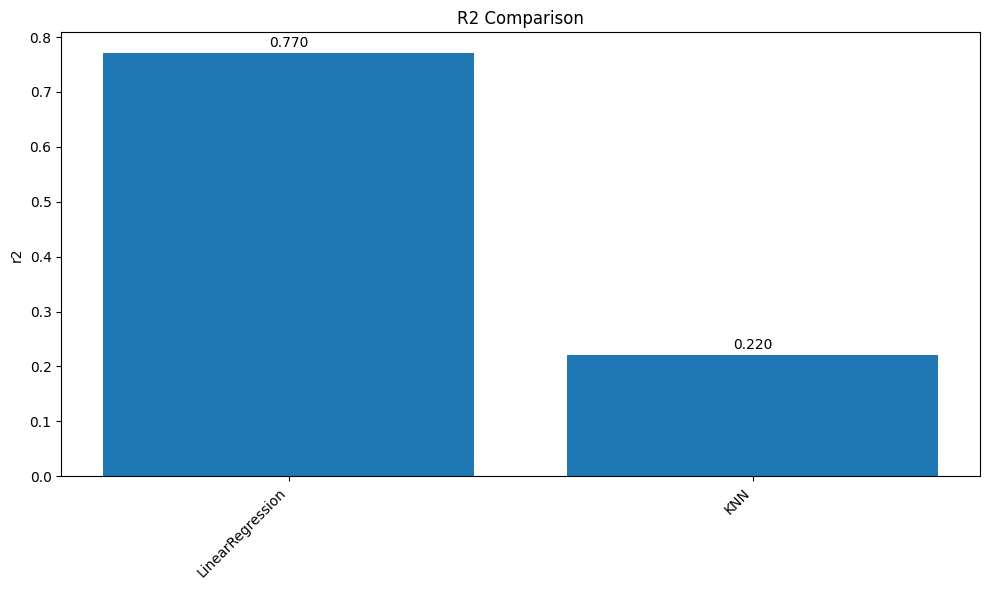

,model,r2
0,LinearRegression,0.77
1,KNN,0.22


In [52]:
plot_model_comparison(Results, metric='r2', kind='bar',title='R2 Comparison')


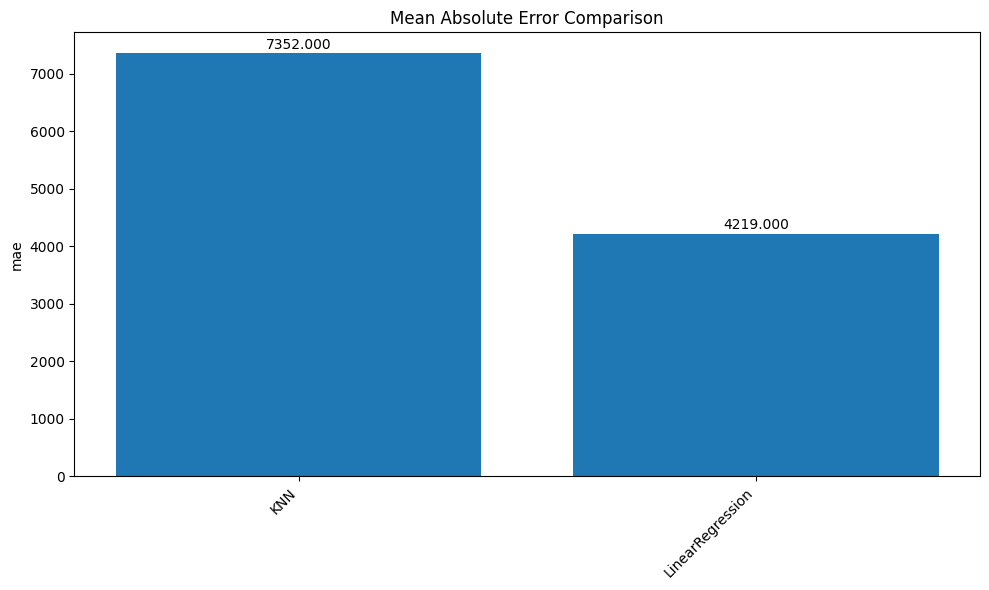

,model,mae
0,KNN,7352.0
1,LinearRegression,4219.0


In [53]:
plot_model_comparison(Results, metric='mae', kind='bar',title='Mean Absolute Error Comparison')

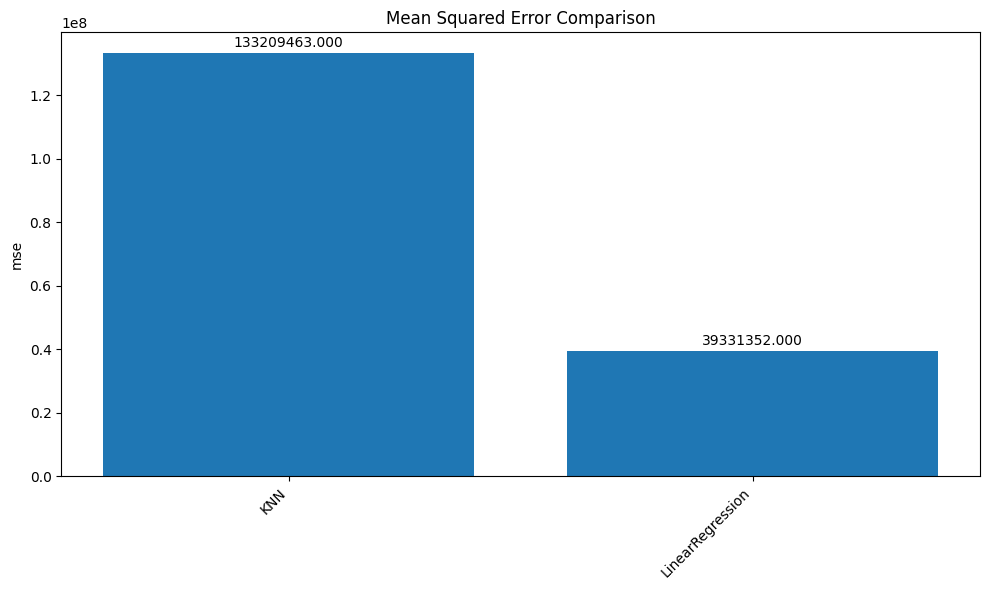

,model,mse
0,KNN,133209463.0
1,LinearRegression,39331352.0


In [54]:
plot_model_comparison(Results, metric='mse', kind='bar',title='Mean Squared Error Comparison')

## UI

This step is saving model for implementing on it GUI 

In [55]:
import joblib
best_model=joblib.dump(model, 'linear_regression_model.pkl')

Installing <code>StreamLit</code> and <code>Ngrok </code>

In [56]:
# ! pip install streamlit 
! pip install pyngrok

Defaulting to user installation because normal site-packages is not writeable


In [57]:
%%writefile app1.py
import joblib
import streamlit as st
import pandas as pd
Rf_Model=joblib.load('linear_regression_model.pkl')
st.title('Prediction Of Health Insurance Expenses Charges According to smoking, age & BMI')
Smoking=st.selectbox('Please Select Smoking Status',options=['Non Smoker','Smoker'])
Smoking_Num=1 if Smoking=='Smoker' else 0
Age=st.number_input('Please Enter Your Age')
BMI=st.number_input('Please Enter Your BMI')
Button=st.button('Predict Charges')
if Button:
    input_data=pd.DataFrame({'smoker':[Smoking_Num],'age':[Age],'bmi':[BMI]})
    prediction=Rf_Model.predict(input_data)
    st.success(f'Predicted Health Insurance Expenses Charges is: {prediction[0]:.2f}')




Overwriting app1.py


### Running UI

In [58]:
# ! pip install streamlit 
! pip install pyngrok

Defaulting to user installation because normal site-packages is not writeable


In [59]:
! pip install streamlit jupyter-server-proxy pyngrok


Defaulting to user installation because normal site-packages is not writeable


In [60]:
! python -m streamlit run app1.py 


c:\Users\Ramy Bishop Mina\AppData\Local\Programs\Python\Python313\python.exe: No module named streamlit


In [61]:
! pip install ngrok

Defaulting to user installation because normal site-packages is not writeable
